In [1]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('/content/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df= df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
df.shape()

TypeError: 'tuple' object is not callable

In [8]:
df.shape

(100, 3)

In [10]:
import matplotlib.pyplot as plt

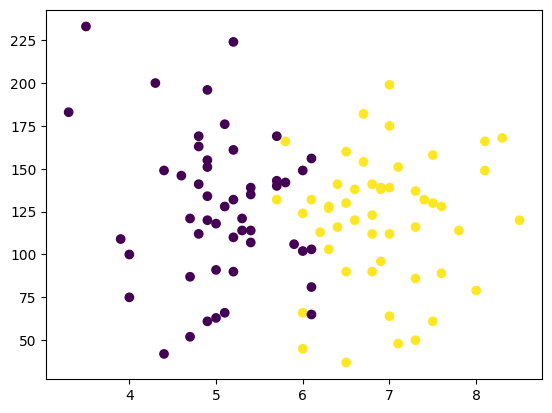

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
x = df.iloc[:,0:2]
y=df.iloc[:,-1]


In [15]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [17]:
y.shape

(100,)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [20]:
x_train

,cgpa,iq
66,6.9,96.0
39,4.6,146.0
79,6.5,90.0
29,7.0,112.0
18,4.0,100.0
...,...,...
15,5.1,176.0
25,5.0,91.0
73,4.9,61.0
78,6.1,81.0


In [21]:
y_train

,placement
66,1
39,0
79,1
29,1
18,0
...,...
15,0
25,0
73,0
78,0


In [22]:
x_test

,cgpa,iq
24,4.7,121.0
56,6.1,65.0
49,5.4,135.0
55,7.8,114.0
21,7.1,151.0
64,7.0,64.0
44,7.5,61.0
8,6.1,156.0
95,4.3,200.0
38,6.5,160.0


In [23]:
y_test

,placement
24,0
56,0
49,0
55,1
21,1
64,1
44,1
8,0
95,0
38,1


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [26]:
x_train

array([[ 0.82442005, -0.70718123],
       [-1.19755803,  0.57034408],
       [ 0.47277169, -0.86048427],
       [ 0.91233214, -0.29837313],
       [-1.72503058, -0.60497921],
       [ 1.2639805 ,  0.21263699],
       [-0.67008549,  0.95360167],
       [-0.75799758,  0.11043497],
       [-0.14261295,  0.46814205],
       [ 0.20903542, -0.27282263],
       [-2.34041521,  1.51571281],
       [-0.23052504,  0.41704104],
       [-1.72503058, -1.24374187],
       [-0.93382176, -0.09396908],
       [ 0.29694751, -0.52832769],
       [-0.75799758, -1.47369642],
       [ 0.73650796,  0.44259155],
       [ 1.79145304, -1.14153984],
       [ 0.29694751,  0.11043497],
       [ 0.03321123, -0.5538782 ],
       [ 0.03321123,  0.00823294],
       [-0.05470086, -0.45167617],
       [ 0.91233214,  1.31130876],
       [-0.49426131,  0.39149054],
       [-1.02173385,  0.44259155],
       [ 0.3848596 , -0.19617111],
       [-0.23052504,  0.49369256],
       [ 2.2310135 , -0.09396908],
       [ 0.03321123,

In [28]:
x_test = scaler.transform(x_test)

In [29]:
x_test

array([[-1.10964594, -0.06841858],
       [ 0.12112332, -1.49924693],
       [-0.49426131,  0.28928851],
       [ 1.61562886, -0.24727212],
       [ 1.00024423,  0.69809661],
       [ 0.91233214, -1.52479744],
       [ 1.35189259, -1.60144895],
       [ 0.12112332,  0.82584914],
       [-1.4612943 ,  1.95007142],
       [ 0.47277169,  0.92805117]])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression()

In [32]:
clf.fit(x_train,y_train)
# model training

LogisticRegression()

In [33]:
y_pred = clf.predict(x_test)


In [34]:
y_test


,placement
24,0
56,0
49,0
55,1
21,1
64,1
44,1
8,0
95,0
38,1


In [35]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train,clf=clf,legend=2)

ValueError: y must be a NumPy array. Found <class 'pandas.core.series.Series'>

In [38]:
!pip install mlxtend


<Axes: >

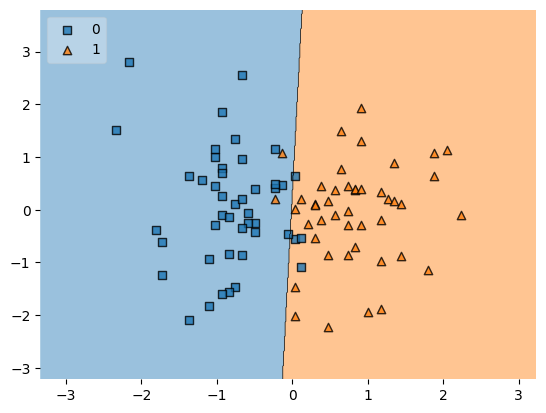

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf,open('model.pkl','wb'))